In [1]:
from scapy.all import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
paquetes = rdpcap('../datos/sniff_ethernet.cap')

In [3]:
freq = {}
paquetes = paquetes.filter(lambda pkt: pkt.getlayer(1) != None and Ether in pkt)
for pkt in paquetes:
    # Ethernet
    tipo = 'broadcast' if pkt[Ether].dst == 'ff:ff:ff:ff:ff:ff' else 'unicast'
    proto = pkt.getlayer(1).name

    # Wifi
    #

    freq[(tipo,proto)] = freq[(tipo,proto)] + 1 if (tipo,proto) in freq else 1

entropia = 0
for k in freq:
        p = freq[k] / len(paquetes) 
        entropia += -p * math.log(p)
        

max_entropia = math.log(len(freq))

In [4]:
tablainfo = pd.Series(data = freq).to_frame(name = "Cantidad de Paquetes")
tablainfo.index = tablainfo.index.set_names(["Tipo","Protocolo"])
tablainfo['Información [Bits]'] = tablainfo['Cantidad de Paquetes'].apply(lambda x: np.log(len(paquetes)/x))
tablainfo.sort_values('Información [Bits]', inplace = True, ascending = False)
tablainfo

Cantidad de Paquetes  Información [Bits]
Tipo      Protocolo                                          
unicast   LLC                           1            9.208138
          EAPOL                        16            6.435549
broadcast IP                          273            3.598666
          ARP                         483            3.028121
unicast   IPv6                       1284            2.050402
          ARP                        2246            1.491232
          IP                         5675            0.564312

In [5]:
pd.Series({'Entropia fuente': entropia, 'Entropía máxima': max_entropia}).to_frame(name = "Información [Bits]")

,Información [Bits]
Entropia fuente,1.176758
Entropía máxima,1.945910


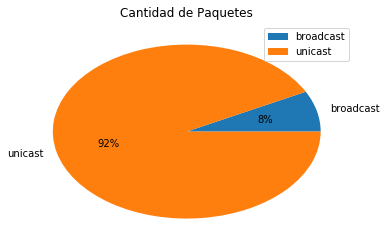

In [6]:
unibroad = pd.Series(data = freq).to_frame(name = "Cantidad de Paquetes").reset_index(level = 1, drop = True)
unibroad = unibroad.reset_index().groupby('index').agg('sum')
unibroad.plot(y = 'Cantidad de Paquetes', kind = 'pie', autopct='%1.0f%%', title='Cantidad de Paquetes').set_ylabel('')
plt.show()

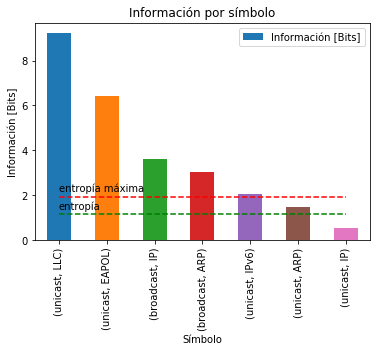

In [23]:
ax = tablainfo.plot(y = 'Información [Bits]', kind = 'bar', title = 'Información por símbolo')
ax.set_ylabel('Información [Bits]')
ax.set_xlabel('Símbolo')
ax.plot([0, 6], [entropia, entropia], "g--")
ax.annotate("entropía", (0, entropia + 0.2))
ax.plot([0, 6], [max_entropia, max_entropia], "r--")
ax.annotate("entropía máxima", (0, max_entropia + 0.2))
plt.show()